# Intro for Telco Co Classification project
#### by Jason R. Turner
#### Codeup Student
##### May 26, 2022

In [1]:
# prepare
import pandas as pd
import numpy as np
import acquire
import prep

# visualize and explore
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('figure', figsize=(8, 6))
plt.rc('font', size=13)
from scipy import stats

# turn off pink warning boxes
import warnings
warnings.filterwarnings("ignore")

# acquire
import env


## Project overview
- This is a data science project using the telcoCo data set from the Codeup database that demonstrates using Python, Jupyter notebook, creating modueles, and using Github.
- It shows the process of using the data science pipeline to plan, acquire, prepare, explore, model, and present the data in a 5 minute presentation.
- The presentation is directed towards the direct manager and their manager with the intent of better understanding the reasons behind customer churn to include expaining why, what, and how I began my investigation and came to a conclusion with key takeaways.
- The reason why I decided to build this project by asking these questions is because I believe these may be overlooked areas that could show some easier ways we could lower churn

## Project Plan:
The plan is to use our access to the Codeup database to acquire data which we'll use to figure out why customers at the Telco Co are churning.
Once we've written the proper python code in a module to acquire the data that we want we'll run it and save it as a cache to our local computer.
From there we'll use another module which we'll use to prepare our data by splitting it up into three separate groups making sure that the variable we want, which is churn is evenly distributed.
The three groups will be train, our largest group, validate, and test.
Depending on the question we're asking we'll run various statistical tests and produce visualizations to help us better understand the data.
Once we're ready to model our data we will encode it into numbers that our machine learning algorithms can accept.
We'll select appropriate models that can be run based on the kind of data that we're dealing with.
We'll run it through multiple machine models till we come up with our best ones.
We'll use run the model using our validate set to further narrow these down to our single best model.
We'll then use our untouched test set with the best model to make our best predictions.

## Goals
- To uncover the main reasons why customers churn here at Telco
- To create a report that non-data scientists can understand by asking the following:
1. Do customers who use Tech Support churn at a significantly different rate and if so is it more or less?

2. What are the rates of churn of 1 and 2 year contracts both before and after fullfilling their obligations as compared to month-to-month contracts?

3. What groups of customers pay the most in monthly charges but aren't churning?
    
4. Is there a significant difference in correlation between monthly charges and tenure for customers churn vs those who do not?

## Exploration

In [2]:
# using function from acquire module to access database and make a dataframe
telco_df = acquire.get_telco_data()

In [3]:
# checking for any null values, which shows there are none.
pd.isnull(telco_df).sum()

payment_type_id             0
internet_service_type_id    0
contract_type_id            0
customer_id                 0
gender                      0
senior_citizen              0
partner                     0
dependents                  0
tenure                      0
phone_service               0
multiple_lines              0
online_security             0
online_backup               0
device_protection           0
tech_support                0
streaming_tv                0
streaming_movies            0
paperless_billing           0
monthly_charges             0
total_charges               0
churn                       0
contract_type               0
internet_service_type       0
payment_type                0
dtype: int64

In [4]:
# splitting data into train, validate, and test dfs
train, validate, test = prep.prep_telco(telco_df)

### Question 1 -  Do customers who use Tech Support churn at a significantly different rate and if so is it more or less?

In [5]:
# setting α at 0.05 for a 95% confidence interval
α = 0.05

- $H_0$ : Null hypothesis - "Customers who use Tech Support do not churn at a rate significantly different than those who don't use Tech Support."
- $H_a$ : Alternative hypothesis - "Customers utilizing Tech Support churn at a significantly different rate than non-Tech Support users."

In [6]:
# creating a crosstabulation between Tech Support and Churn
tech_sup_xtab = pd.crosstab(train.tech_support, train.churn)

# displays crosstab results
tech_sup_xtab

churn,No,Yes
tech_support,,
No,739,538
No internet service,483,38
Yes,640,97


### Comparing number of people using Tech Support in relation to churn

Text(0, 0.5, 'number of people')

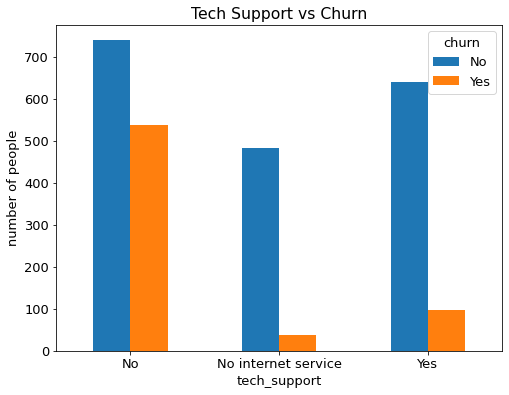

In [95]:
# creates a barplot from crosstab which compares churn rates and Tech Support
barplot = tech_sup_xtab.plot.bar(rot=0)
plt.title('Tech Support vs Churn')
plt.ylabel('number of people')


### $chi^2$ statistical test for categorical variables

In [8]:
# conducts chi square test for tech support crosstabulation assigning 4 
# variables because the fx returns 4 values
chi2, p, degf, expected = stats.chi2_contingency(tech_sup_xtab) 
# displays the p-value which we're looking for
p

1.812057131105163e-71

In [9]:
# if statement to print out result of our null hypothesis
if p < α:
        print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Reject the null hypothesis


- **Answer 1** - I fail to reject the null hypothesis due to the extremely small p-value from given by the Chi Square statistical test which is well below the set alpha of 0.05. 
- Based on the crosstabulation and visualization it clearly shows that those with no Tech Support churn at a much higher rate than those who do receive Tech Support.
- Key takeaway is that offering Tech support appears to significantly reduce the churn rate among customers.
- Recommendation would be to make sure all customers know about Tech Support and make it easily accesible. Also make sure to offer Tech Support services to customers attempting to churn in circumstances where it makes sense.

### Question 2 - What are the differences in churn rates for 1 and 2 year contracts as compared to month-to-month contracts?

In [10]:
# apparently contract is abbreviated with just "K" in law circles
# creates a crosstab from train df with churn and contract type
k_type_xtab = pd.crosstab(train.contract_type, train.churn)
k_type_xtab

churn,No,Yes
contract_type,,
Month-to-month,795,601
One year,494,56
Two year,573,16


In [11]:
# conducts chi square test for contract types crosstabulation assigning 4 
# variables because the fx returns 4 values
chi2, p, degf, expected = stats.chi2_contingency(k_type_xtab)

# returns the p-value that we're looking for 
p

1.0087882778509815e-96

### Comparing the differences between month-to-month and yearly plans

Text(0, 0.5, 'number of customers')

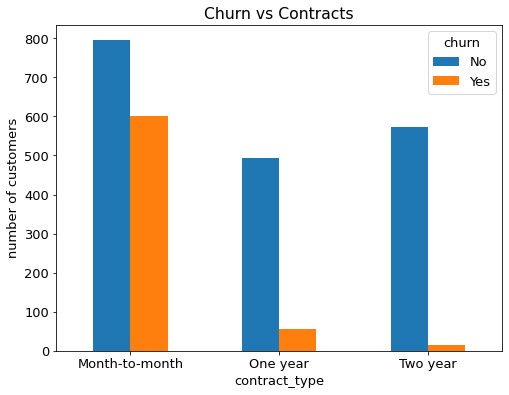

In [96]:
# creates a bar plot for our churn against contract types
barplot = k_type_xtab.plot.bar(rot=0)
plt.title('Churn vs Contracts')
plt.ylabel('number of customers')

In [13]:
# puts customers who've been with telco for 2 or more years in a new df
two_yrs_plus = train[train.tenure >= 24]

In [14]:
# selects customers who also had the two yr contract
k_type_3x2yrs_plus = two_yrs_plus[two_yrs_plus.contract_type_id == 3]

In [15]:
# crosstabs and returns churn with 2 yr contract customers with 24+ months
k_type_3x2yrs_plus_xtab = pd.crosstab(k_type_3x2yrs_plus.contract_type, k_type_3x2yrs_plus.churn)
k_type_3x2yrs_plus_xtab

churn,No,Yes
contract_type,,
Two year,526,16


In [16]:
# puts customers who've been with telco for 2 or more years in a new df
lessthan_2yrs = train[train.tenure < 24]

In [17]:
# selects customers who also had the two yr contract
k_type_3xlessthan_2yrs = lessthan_2yrs[lessthan_2yrs.contract_type_id == 3]

In [18]:
# crosstabs and returns churn with 2 yr contract customers with <24 months
k_type_3xlessthan_2yrs_xtab = pd.crosstab(k_type_3xlessthan_2yrs.contract_type, k_type_3xlessthan_2yrs.churn)
k_type_3xlessthan_2yrs_xtab

churn,No
contract_type,
Two year,47


In [19]:
# puts customers who've been with telco for 1 or more years in a new df
one_yr_plus = train[train.tenure >= 12]

In [20]:
# selects customers who also had the 1 yr contract
k_type_2x1yr_plus = one_yr_plus[one_yr_plus.contract_type_id == 2]

In [21]:
# crosstabs and returns churn with 2 yr contract customers with 12+ months
k_type_2x1yr_plus_xtab = pd.crosstab(k_type_2x1yr_plus.contract_type, k_type_2x1yr_plus.churn)
k_type_2x1yr_plus_xtab

churn,No,Yes
contract_type,,
One year,463,52


In [22]:
# puts customers who've been with telco for less than 1 yr in a new df
lessthan_1yr = train[train.tenure < 12]

In [23]:
# selects customers who also had the 1 yr contract
k_type_2xlessthan_1yr = lessthan_1yr[lessthan_1yr.contract_type_id == 2]

In [24]:
# crosstabs and returns churn with 2 yr contract customers with <12 months
k_type_2xlessthan_1yr_xtab = pd.crosstab(k_type_2xlessthan_1yr.contract_type, k_type_2xlessthan_1yr.churn)
k_type_2xlessthan_1yr_xtab

churn,No,Yes
contract_type,,
One year,31,4


In [25]:
# puts customers who've been with telco for 1 or more months in a new df
one_mo_plus = train[train.tenure >= 1]

# selects customers who had the month-to-month contract
k_type_1x1_mo_plus = one_mo_plus[one_mo_plus.contract_type_id == 1]

In [26]:
# crosstabs and returns churn with 2 yr contract customers with 1+ months
k_type_1x1_mo_plus_xtab = pd.crosstab(k_type_1x1_mo_plus.contract_type, k_type_1x1_mo_plus.churn)
k_type_1x1_mo_plus_xtab

churn,No,Yes
contract_type,,
Month-to-month,795,601


In [27]:
# puts customers who've been with telco for less than 1 month in a new df
lessthan_1mo = train[train.tenure < 1]

# selects customers who had the month-to-month contract
k_type_1xlessthan_1mo = lessthan_1mo[lessthan_1mo.contract_type_id == 1]
lessthan_1mo

# *Note* there's no month-to-month customers with less than a month of service 
# but there are for 1 yr and 2 yr contracts in this training set

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
945,4,1,3,1371-DWPAZ,Female,0,Yes,Yes,0,No,...,Yes,Yes,No,No,56.05,,No,Two year,DSL,Credit card (automatic)


In [28]:
# merges and return the previous crosstabs together into a new df
merged_df = pd.concat([k_type_3x2yrs_plus_xtab, k_type_3xlessthan_2yrs_xtab, k_type_2x1yr_plus_xtab, k_type_2xlessthan_1yr_xtab, k_type_1x1_mo_plus_xtab])
merged_df

# *Note* used merged_df.fillna(0) to fill in null from merge and it should be 0
# but cut code because it still doesn't have enough values to run chi^2 test

churn,No,Yes
contract_type,,
Two year,526,16.0
Two year,47,NaN
One year,463,52.0
One year,31,4.0
Month-to-month,795,601.0


In [29]:
# attempted chi2 test but it failed for all assigned variables due to lack of
# enough Yes churn values
chi2, p, degf, expected = stats.chi2_contingency(merged_df)
p

nan

### Comparing churners who stay for their contract length vs those who don't

Text(0, 0.5, 'Number of Customers')

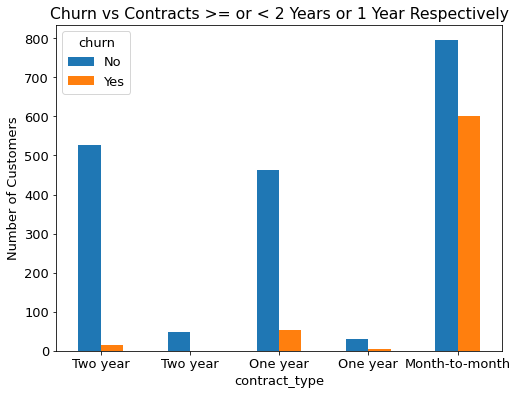

In [91]:
# bar plot showing churn for each of the categories
merged_df.plot.bar(rot=0)
plt.title('Churn vs Contracts >= or < 2 Years or 1 Year Respectively')
plt.ylabel('Number of Customers')

- **Answer 2** - I found differences in the churn rates of customers who did and didn't fulfill the obligated length of their contracts
- Those who stayed for the length of their 1 or 2 year contracts had a higher churn rates compared those who haven't finished their contract.
- Month-to-month customers had much higher rates of churn compared to the longer contracts
- The training data shows no month-to-month customers staying for less than a month but there were some from the 1 and 2 year contracts.
- The barplot shows the comparison of the different contract types we have.
- Key takeaways are that month-to-month customers churn at a much higher rate than other contract types.  Two year contracts appear to have the best retention rates.
- Recommendation would be to offer incentives for month-to-month customers to become one or preferably two year contract customers.

### Question 3 - What groups of customers pay the most in monthly charges but aren't churning?

In [31]:
import math
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [32]:
# Average monthly charges for train data
train.monthly_charges.mean()

65.02185404339245

In [33]:
# Total percentage of churn for train data
((train.churn == 'Yes').sum()/len(train))

0.2654832347140039

In [34]:
# gets the top 5% on customers with highest monthly charges
top_5_pct = train.nlargest(math.floor(.05*(len(train))),'monthly_charges')

In [35]:
# Average of the top 5% of monthly charges from train data
top_5_pct.monthly_charges.mean()

111.42539682539683

In [36]:
# crosstabulation of customers with the top 5% in monthly charges with churn
top_5_pct_xtab = pd.crosstab(top_5_pct.shape[0], top_5_pct.churn)
top_5_pct_xtab

churn,No,Yes
row_0,,
126,109,17


### Bar chart showing the churn rate of the top 5% highest monthly charges

Text(0.5, 0, 'total people')

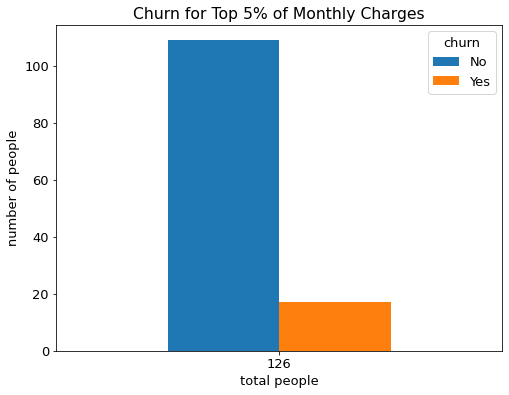

In [97]:
# bar plot showing differences in churn for top 5%
top_5_pct_xtab.plot.bar(rot=0)
plt.title('Churn for Top 5% of Monthly Charges')
plt.ylabel('number of people')
plt.xlabel('total people')

In [38]:
# Gets top 5% from those who don't churn
top_5_pct_no_churn = top_5_pct[top_5_pct.churn == 'No']

In [39]:
# pre-processes only the categorical variables of top 5% df
clean_top_5_pct = prep.clean_telco_cat(top_5_pct)

In [40]:
# pre-processes our explored data sets for machine learning
retrain = prep.clean_telco_cat(train)
revalidate = prep.clean_telco_cat(validate)
retest = prep.clean_telco_cat(test)

In [41]:
# splits our training set into x and y values to run in our algorithms
X_train = retrain.drop(columns=['churn_Yes'])
y_train = retrain['churn_Yes']

# splits our validate set into x and y values to run in our algorithms
X_validate = revalidate.drop(columns=['churn_Yes'])
y_validate = revalidate['churn_Yes']

# splits our test set into x and y values to run in our algorithms
X_test = retest.drop(columns=['churn_Yes'])
y_test = retest['churn_Yes']

In [42]:
# returns the most common answer for churn_Yes, which is 0 meaning our baseline
# is that they won't churn
baseline = y_train.mode()
baseline

0    0
dtype: uint8

In [43]:
# calculates our expected baseline accuracy
matches_baseline_prediction = y_train == 0
baseline_accuracy = matches_baseline_prediction.mean()
baseline_accuracy

0.7345167652859961

In [44]:
# makes a Random Forest model six steps deep
reforest = RandomForestClassifier(max_depth=6, random_state=321)

In [45]:
# fits our training set into our RF algorithm model
reforest.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, random_state=321)

In [46]:
# shows the relative percentages out of 1 of the weight of each feature in the
# model
np.round(reforest.feature_importances_, 3)

array([0.017, 0.01 , 0.024, 0.023, 0.005, 0.005, 0.008, 0.013, 0.108,
       0.021, 0.042, 0.022, 0.017, 0.009, 0.121, 0.028, 0.007, 0.024,
       0.006, 0.026, 0.099, 0.131, 0.112, 0.026, 0.008, 0.081, 0.006])

In [47]:
# makes a prediction for each value based on our training data
y_pred = reforest.predict(X_train)

In [48]:
# gives the probabilities the model gave for each value it used to make a prediction
y_pred_proba = reforest.predict_proba(X_train)

In [49]:
# prints out an accuracy score statement for random forest on the training set
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(reforest.score(X_train, y_train)))

Accuracy of random forest classifier on training set: 0.80


In [50]:
# gives us a confusion matrix based on the predictive outcome it had for each value
print(confusion_matrix(y_train, y_pred))

[[1720  142]
 [ 377  296]]


In [51]:
# prints out a report showing the recall, precision, and accuracy for the number
# of values that fell into each outcome.
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1862
           1       0.68      0.44      0.53       673

    accuracy                           0.80      2535
   macro avg       0.75      0.68      0.70      2535
weighted avg       0.78      0.80      0.78      2535



In [52]:
# prints out an accuracy score statement for random forest for the validate set
print('Accuracy of random forest classifier on test set: {:.2f}'
     .format(reforest.score(X_validate, y_validate)))

Accuracy of random forest classifier on test set: 0.77


### KNN

In [53]:
# sets up the  K-Nearest Neighbors model; weights = ['uniform', 'density']
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')

In [54]:
# fits the knn model to the training data
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [55]:
# prints out an accuracy score statement for KNN on the training set
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))

Accuracy of KNN classifier on training set: 0.83


In [56]:
# since knn is the best fitting model it's fitted against the test set
knn.fit(X_test, y_test)

KNeighborsClassifier()

In [57]:
# prints out an accuracy score statement for KNN on the test set
print('Accuracy of KNN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of KNN classifier on test set: 0.81


In [58]:
# a variable for the a numpy array of the prediction made for each value
# in the test set
y_pred = knn.predict(X_test)

In [59]:
# a variable for the probabilities it gave each value in making its predictions
y_pred_proba = knn.predict_proba(X_test)

In [75]:
Prodiction = pd.concat([customer_id,pd.concat([prediction_of_churn, probability_of_churn], ignore_index=True)], axis=1)
Prodiction

,customer_id,prediction of churn,probability,of churn
0,0002-ORFBO,0.0,NaN,NaN
1,0003-MKNFE,1.0,NaN,NaN
2,NaN,0.0,NaN,NaN
3,NaN,0.0,NaN,NaN
4,NaN,0.0,NaN,NaN
...,...,...,...,...
7031,9974-JFBHQ,NaN,NaN,NaN
7032,9975-GPKZU,NaN,NaN,NaN
7033,9975-SKRNR,NaN,NaN,NaN
7034,9978-HYCIN,NaN,NaN,NaN


In [61]:
# prints a confusion matrix for the predictive outcomes of the test values
print(confusion_matrix(y_test, y_pred))

[[1808  262]
 [ 267  481]]


In [62]:
# prints a report out showing the recall, precision, and accuracy for the number
# of values that fell into each possible outcome
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      2070
           1       0.65      0.64      0.65       748

    accuracy                           0.81      2818
   macro avg       0.76      0.76      0.76      2818
weighted avg       0.81      0.81      0.81      2818



### Decision Tree

In [63]:
# sets a variable for the decision tree classification down six levels
clf = DecisionTreeClassifier(max_depth=6, random_state=321)

In [64]:
# fits the decision tree model to our training data set
clf = clf.fit(X_train, y_train)

In [84]:
# makes a decision tree prediction on the training set obeservations
y_pred = clf.predict(X_train)

In [85]:
# provides the probabilities it use to make predictions on the training set
y_pred_proba = clf.predict_proba(X_train)

In [67]:
# prints out an accuracy score statement for the decision tree model on the train set
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf.score(X_train, y_train)))


Accuracy of Decision Tree classifier on training set: 0.80


In [68]:
# prints a confusion matrix for the predictive outcomes for the train values
confusion_matrix(y_train, y_pred)

array([[1639,  223],
       [ 294,  379]])

In [86]:
# prints a report out showing the recall, precision, and accuracy for the number
# of values that fell into each possible outcome
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1862
           1       0.63      0.56      0.59       673

    accuracy                           0.80      2535
   macro avg       0.74      0.72      0.73      2535
weighted avg       0.79      0.80      0.79      2535



In [71]:
# prints out an accuracy score statement for the decision tree model on the validate set
print('Accuracy of Decision Tree classifier on validate set: {:.2f}'
     .format(clf.score(X_validate, y_validate)))

Accuracy of Decision Tree classifier on validate set: 0.76


In [72]:
# uses the validate set to make predictions for the decision tree classification model
y_pred = clf.predict(X_validate)

# Compares actual y values (from validate) to predicted y_values from the model run on X_validate
print(classification_report(y_validate, y_pred))


              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1242
           1       0.56      0.52      0.54       448

    accuracy                           0.76      1690
   macro avg       0.69      0.68      0.69      1690
weighted avg       0.76      0.76      0.76      1690



- **Answer 3** - I found that the number of values for some of the binary choices was too low to run a statistical test or model.
- I went back to using the entire train data set to see if there was still a relationship to churn for all customers
- It did show that there was a relationship and random forest provided the best working model
- Key takeaways are that there is a fairly strong positive correlation between churn and monthly charges for all customers in relation to churn.
- Recommendations would be to perhaps try to offer new customers bundles with lowly monthly payments for the first year, preferably two or to offer long time customers some kind of loyalty discount

### Question 4: Is there a significant difference in correlation between monthly charges and tenure for customers who churn vs those who do not?

- $H_0$ : Null hypothesis - "There is no difference in correlation between customers who churn and those who do not when it comes to tenure and monthly_charges."
- $H_a$ : Alternative hypothesis - "There is a difference in correlation between customers who churn and those who do not when it comes to tenure and monthly_charges."

In [ ]:
# setting α at 0.05 for a 95% confidence interval
α = 0.05

In [77]:
# variable for customers who churned in training data set
churn_train = train[train.churn == 'Yes']

In [78]:
# variable for customers who did not churn in training data set
no_churn_train = train[train.churn == 'No']

### Pearson's Correlation of tenure vs monthly charges for churned customers

In [79]:
# sets x & y values equal to churned tenure and monthly charges for correlation test
x = churn_train.tenure
y = churn_train.monthly_charges

corr, p = stats.pearsonr(x, y)
corr, p

(0.4011876517545688, 2.0526875305919458e-27)

### Pearson's Correlation of tenure vs monthly charges for non-churned customers

In [80]:
# sets x & y values equal to not churned tenure and monthly charges for correlation test
x = no_churn_train.tenure
y = no_churn_train.monthly_charges

corr, p = stats.pearsonr(x, y)
corr, p

(0.3416529497806727, 3.983094795217497e-52)

### Scatterplot showing monthly charges compared to tenure for churners

Text(0.5, 1.0, 'Churned Tenure vs Monthly Charges')

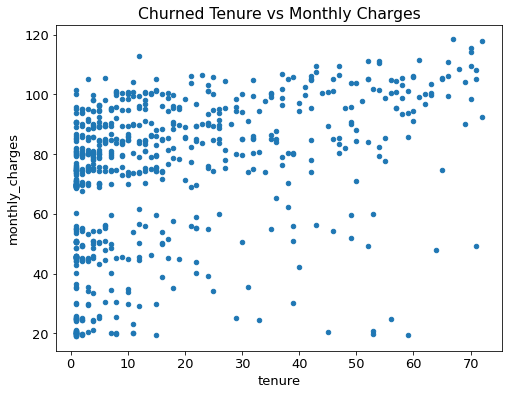

In [81]:
# visualizes distribution of correlation for churned customers in a scatter plot
churn_train.plot.scatter('tenure', 'monthly_charges')
plt.title('Churned Tenure vs Monthly Charges')

### Scatterplot showing monthly charges vs tenure for non-churners

Text(0.5, 1.0, 'Unchurned Tenure vs Monthly Charges')

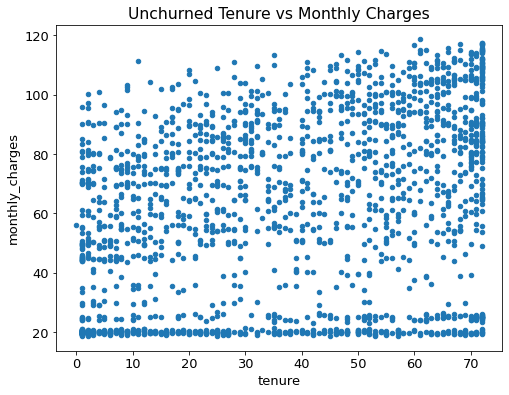

In [82]:
# visualizes distribution of correlation for non-churned customers in a scatter plot
no_churn_train.plot.scatter('tenure', 'monthly_charges')
plt.title('Unchurned Tenure vs Monthly Charges')

In [87]:
# if statement to print out result of our null hypothesis
if p < α:
        print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Reject the null hypothesis


- **Answer 4** -  I fail to reject the null hypothesis due to the extremely small p-value from given by Pearson's Correlation Coefficient statistical test which is well below the set alpha of 0.05
- Yes, there is a stronger correlation between tenure and monthly charges for those who churn compared to those who did not churn.
- The correlation is on the weak side but is still quite discernable once it's shown in a scatterplot.
- Key takeaways are that people who churned tended to have higher monthly charges that also tended to increase with tenure
- Recommendation would be try contacting customers at high risk of churning and seeing if there are services they can do without or downgrade for cheaper monthly payments

## Conclusion
- There are many different factors that show some correlation or dependence in relation to churn
- This is a fairly small number of people compare to other telecommnucations companies, so there may be other factors at play that may result in spurious correlations
- The churn we see is likely the culmination of many factors that result in higher overall charges and the ease of switching without the yearly contracts.
- My recommendation is that we increase our profit margin by raising prices saying it's necessary due to inflation but offer a friends & family plans at a slightly discounted rate so that they encourage people to they know to join their plan, making it more difficult for them to churn on their own.
- To improve our results I suggest that we get credit alerts for our customers to determine who is struggling financially since we may be able to offer them alternative  forms of payment like lines of credit for loans.